## Introduction 
We assume the ratio of explained variance should also be considered when we use the PC1 for the Chromosome compartment analysis:

1. If we can't see any regular pattern showing in the visualization of the Pearson matrix, this might leads to a low explained variance ratio of the PC1, and the PC1 is of-course useless for identifying the compartment pattern.
2. Since the Hi-C Pearson matrix will usually shows the well separated plaid-pattern, the result explained variance ratio of the PC1 will be high enough for the compartment analysis. However, if we find out the explained variance ratio of the PC1 for the Hi-C Pearson matrix is quite low, it might become a caveat to consider whether the PC1 is suitable for identifying the compartment pattern.

In [5]:
from hicpap import paptools
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.decomposition import PCA

np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.set_printoptions(threshold=10)
np.random.seed(3)

In [2]:
# Please specify the path where you store the data for the `code_the_paper` 
# https://github.com/ZhiRongDev/HiCPAP/blob/main/docs/code_for_paper.rst
data_store="/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store"

Here we randomly simulate a $d \times d$, symmetric Pearson matrix as the comparison of the regular Hi-C Pearson matrix.

In [6]:
def generate_pearson(d:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(d, d) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(d=250)

We can see that the explained variance ratio of the PC1 is quite low and cannot be used in compartment identification, since there is no regular pattern showing in the heatmap of the Pearson matrix.  

In [18]:
pca = PCA(n_components=1)
pca.fit(pearson_np)
pc1_np = pca.components_[0]
print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance_ratio: {pca.explained_variance_ratio_[0]}")

Length of pc1_np: 250
pc1_np: [-0.06063  0.0888  -0.03239 ...  0.07094 -0.07062  0.01218]
pc1 explained_variance_ratio: 0.028758891412830133


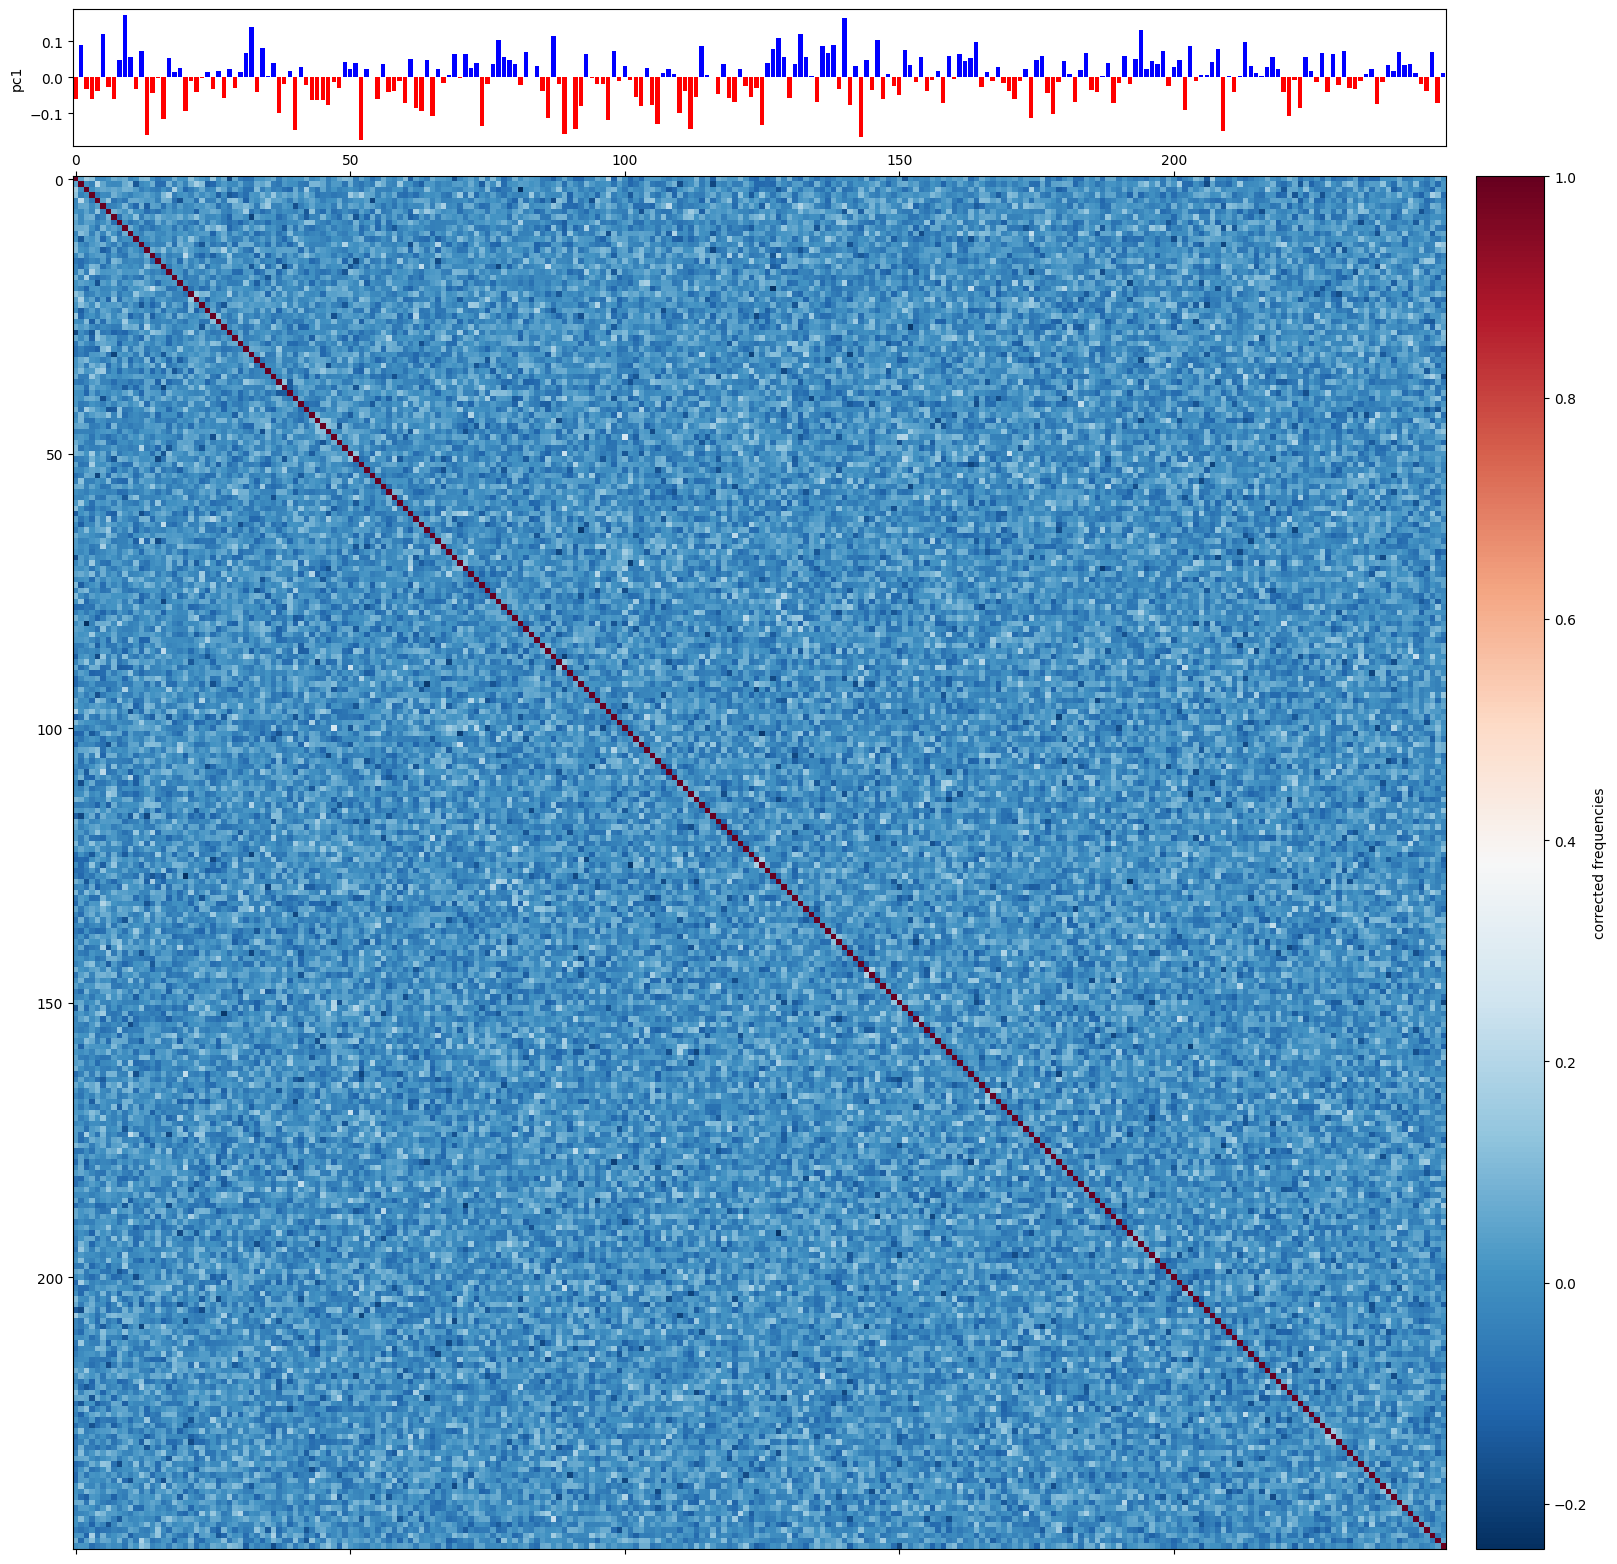

In [19]:
f, ax = plt.subplots(
    figsize=(20, 20),
)
im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)

In [20]:
del f, im, ax, ax1, pearson_np

On the other hand, the explained variance ratio of the Hi-C Pearson matrix's PC1 is very high (GM12878, chromosome 1, resolution 1000000), and the PC1 will reflect the compartments in the Pearson heatmap.

In [21]:
pearson_np = paptools.read_pearson(
    pearson=f"{data_store}/data/rao_2014/juicer_outputs/gm12878/1000000/pearsons/pearson_chr1.txt"
)

pearson_np = pearson_np.astype('float64')
diag = np.diag(pearson_np)
diag_valid = ~np.isnan(diag)
ixgrid = np.ix_(diag_valid, diag_valid) # Record the position of the valid sub-matrix.
pca = PCA(n_components=1)
pca.fit(pearson_np[ixgrid])

# Fill back the NaN entries
pc1_np = np.full(len(diag_valid), np.nan)
pc1_np[diag_valid] = pca.components_[0]

print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance_ratio: {pca.explained_variance_ratio_[0]}")

Length of pc1_np: 250
pc1_np: [-0.02408  0.07592  0.04868 ... -0.0633  -0.08301 -0.06244]
pc1 explained_variance_ratio: 0.8449300048084086


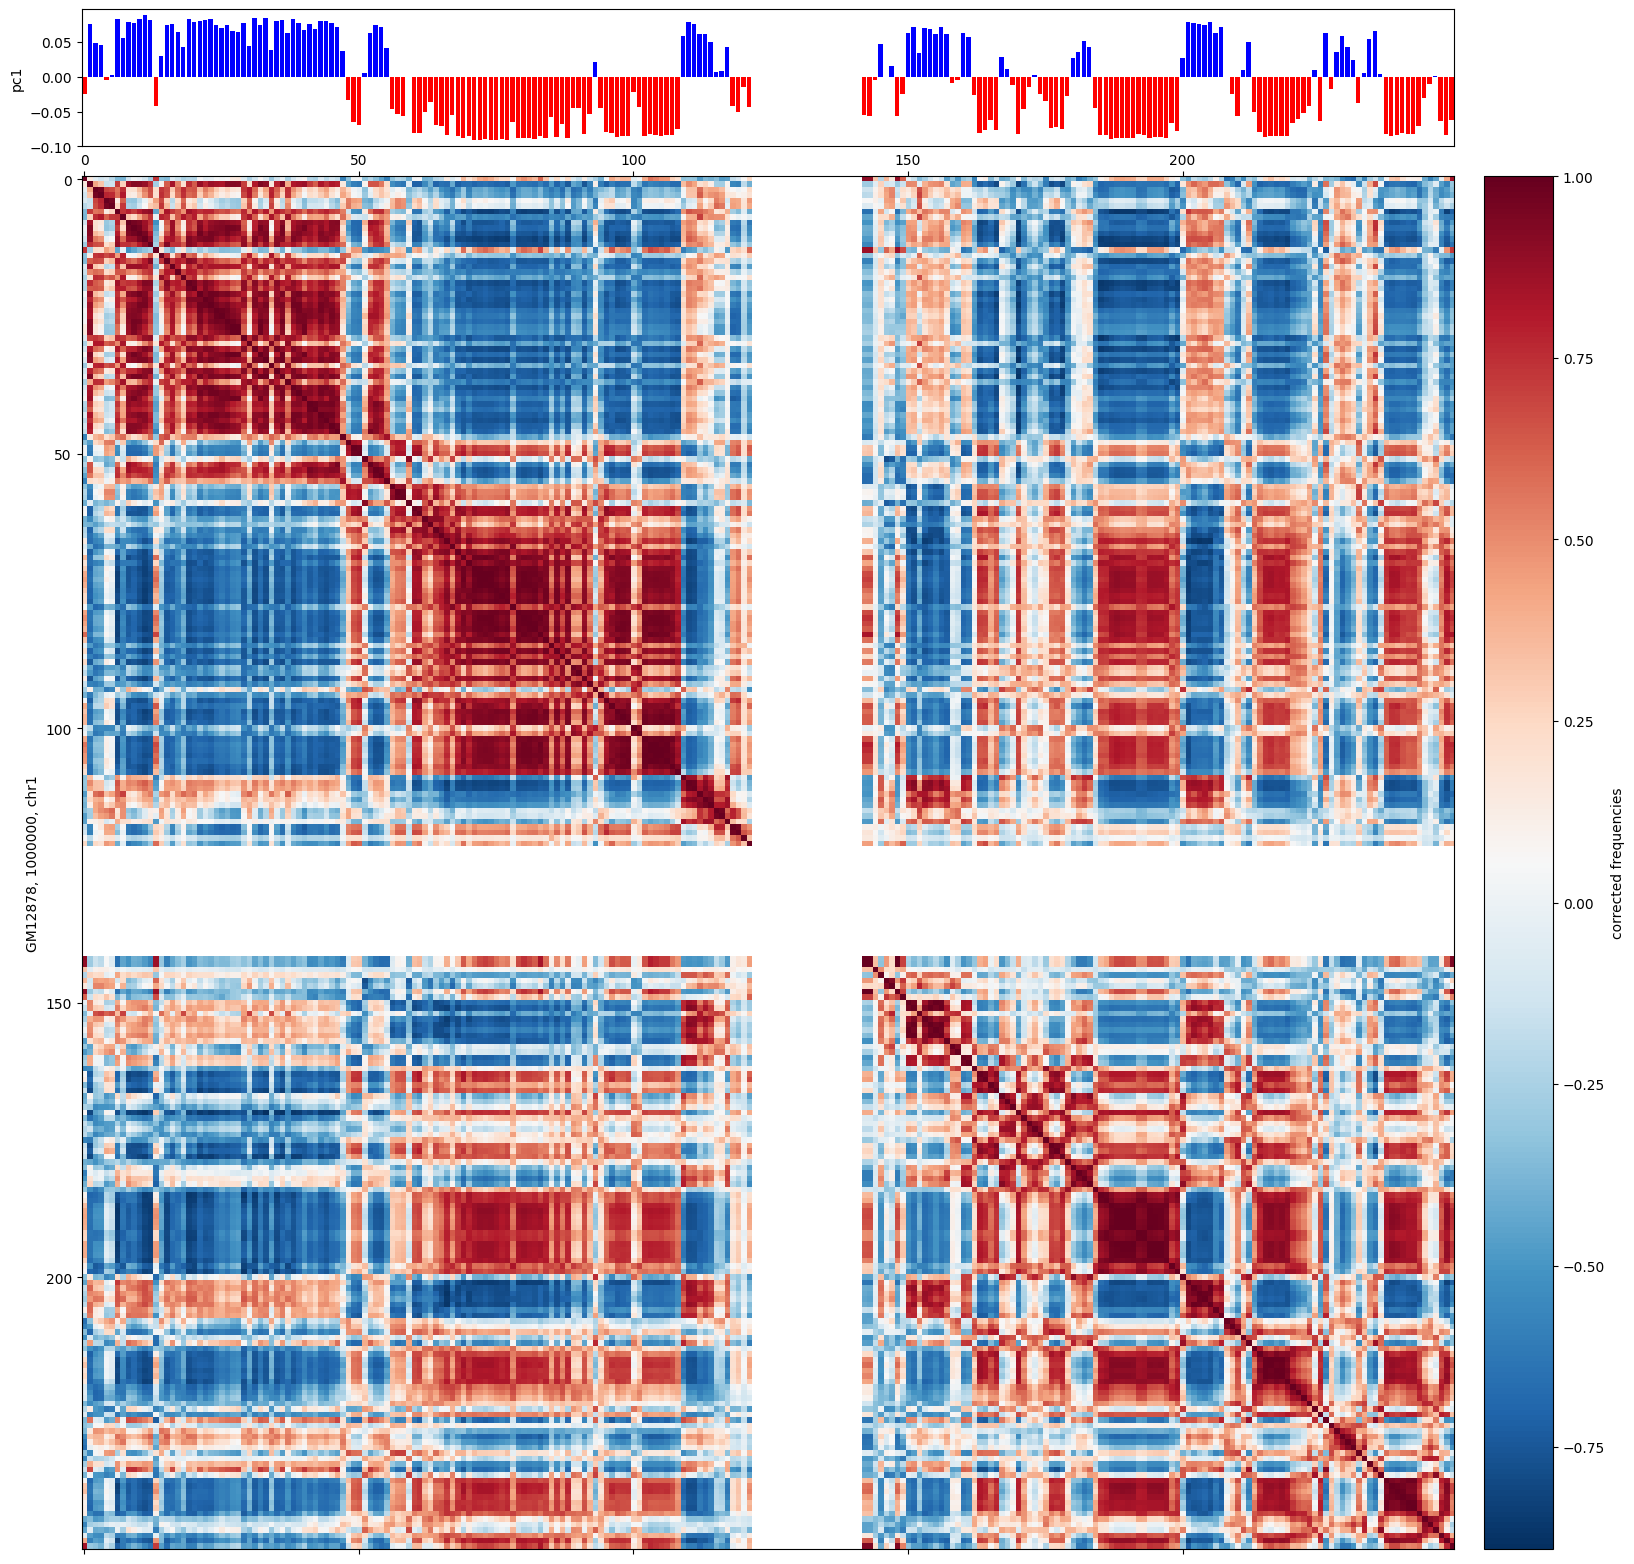

In [22]:
# Settings for pearson_np
f, ax = plt.subplots(
    figsize=(20, 20),
)

im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel(f'GM12878, 1000000, chr1')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)